<a href="https://colab.research.google.com/github/Theagentxero/CAP4630/blob/master/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW3 - Taylor Richards
# Problem 1



### Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

import matplotlib.pyplot as plt

import numpy as np
import random as rnd

### Variable Inputs

The function `get_random_data` produces a set of data classified around a classification line.

The classification line roughly separates the two classes.

Class 0 is defined by starting at any given point on the classification line and moving y + noise

Where Class 1 is the same, but moves y - noise

noise is defined by a random selection across a normal distribution where the mean is `mu` and the standard deviation is `sigma`

Inputs are:

`w` ($ w $): Slope of classification line

`b` ($ b $): Y-Intercept of classification line

`mu` ($ \mu $): Mean of normal distribution, used to create noise

`sigma` ( $ \sigma $ ): standard deviation of normal distribution used to create noise

`m` ($ m $): Count of points to create

In [0]:
# inputs
# Actual Classification Line Is Approximated By
# y = w * x + b

# Slope of classification line
w = 20
# y intercept of classification line
b = 2
# mean of standard distribution (Used to Create Noise)
mu = 8
# σ or sigma standard deviation of distribution (Used to Create Noise)
sigma = 2.5
# count of data points to create
m = 2500

### Functions

#### get_random_data(w, b, mu, sigma, m)

In [0]:
def get_random_data(w, b, mu, sigma, m):

    # create array for data
    data = np.empty((m, 2))
    # create array for labels
    labels = np.empty((m, 1)) 

    # generate m items
    for i in range(0, m):
        # an individual data item may have one of two classes 0 or 1 denoted c
        c = rnd.randint(0, 1) # selects either 0 or 1
        # create some noise for this item, derive the noise from a normal dist
        # normal dist defined by mu and sigma, numpy has a built in function for randomly selecting from a normal distribution
        n = np.random.default_rng().normal(mu, sigma)
        # two features x_1 and x_2
        # x_1 is random across [0, 1)
        x_1 = rnd.random() # random() "which generates a random float uniformly in the semi-open range" - https://docs.python.org/2/library/random.html
        # x_2 = w * x_1 + b + (-1)^c * n
        x_2 = w * x_1 + b + (-1)**c * n
        # add this point to the result arrays
        data[i] = (x_1, x_2)
        labels[i] = c


    return data, labels

#### display_random_data(data, labels)

In [0]:
def display_random_data(data, labels):
    lab_colors = []
    for l in labels:
        if(l == 1):
            lab_colors.append('#ff0000')
        else:
            lab_colors.append('#0000ff')
    
    plt.figure(num=1, figsize=[10,8])
    # print(type(data))
    x, y = np.hsplit(data, 2);
    plt.scatter(x,y,c=lab_colors)
    # plot the actual line
    x = np.linspace(0,1,20)
    y = w * x + b
    actual_line_label = 'Actual Line: y=' + str(w) + "x + " + str(b)
    plt.plot(x, y, '-g', label=actual_line_label)
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

#### display_data_with_pred_line(data, labels, w0, w1, bias0)

In [0]:
def display_data_with_pred_line(data, labels, w0, w1, bias0):
    lab_colors = []
    for l in labels:
        if(l == 1):
            lab_colors.append('#ff0000')
        else:
            lab_colors.append('#0000ff')
    
    plt.figure(num=1, figsize=[10,8])
    # print(type(data))
    x, y = np.hsplit(data, 2);
    plt.scatter(x,y,c=lab_colors)
    # plot the actual line
    x = np.linspace(0,1,20)
    y = w * x + b
    actual_line_label = 'Actual Line: y=' + str(w) + "x + " + str(b)
    plt.plot(x, y, '-g', label=actual_line_label)
    y_pred = - (((w0 * x) + bias)/w1)
    pred_line_label = 'Pred Line: y= - (' + str(w0) + ' * x + ' + str(bias0) + ')/' + str(w1)
    plt.plot(x, y_pred, '#D2691E', label=pred_line_label)
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

### Generate and Display Random Data

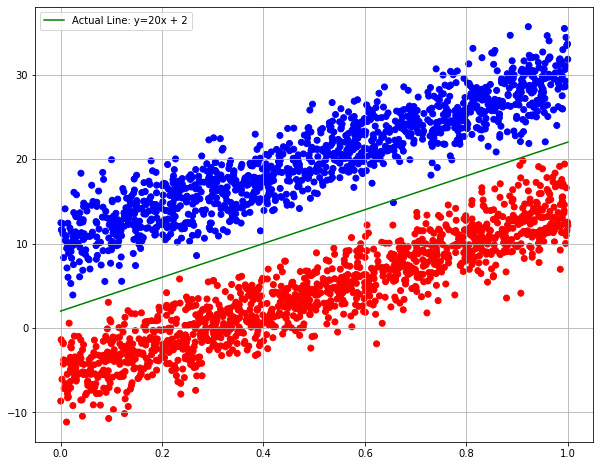

In [188]:
data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

### Split Generated Data Into Training And Testing Sets

In [189]:
# split into training and testing data
# Determine size of training set
training_set_size = round(m * 0.8);
training_data, test_data = data[:training_set_size,:], data[training_set_size:,:]
training_labels, test_labels = labels[:training_set_size,:], labels[training_set_size:,:]

print(str(len(training_data)) + ' Examples Will be Used For Training')
print(str(len(test_data)) + ' Examples Will be Used For Testing')

training_tuple = (training_data, training_labels)
testing_tuple = (test_data, test_labels)

2000 Examples Will be Used For Training
500 Examples Will be Used For Testing


# Problem 2 - Keras Model

### Building The Model

In [190]:
# Build The Model

def build_and_compile_model():
    model = tf.keras.models.Sequential();

    model.add(tf.keras.layers.Dense(1, input_shape=(2,), activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

# Train The Model

# set epoch count, we have low layer count, so we will need alot of epochs
epoch_count = 500

model = build_and_compile_model()
model.summary()
hist = model.fit(training_tuple[0], training_tuple[1], epochs=epoch_count, verbose=0, validation_data=testing_tuple)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


### View Training Histogram

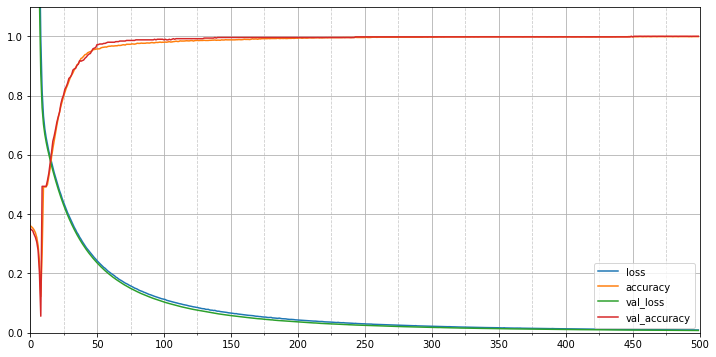

In [191]:
# Lets See The History
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

pd.DataFrame(hist.history).plot(figsize=(12,6))
plt.grid()

plt.gca().set_ylim(0, 1.1)
plt.gca().set_xlim(0, epoch_count)

x_axis_line_count = round(epoch_count/10);

plt.gca().xaxis.set_major_locator(MultipleLocator(x_axis_line_count))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

#### Visualizing Predictions On The Test Data

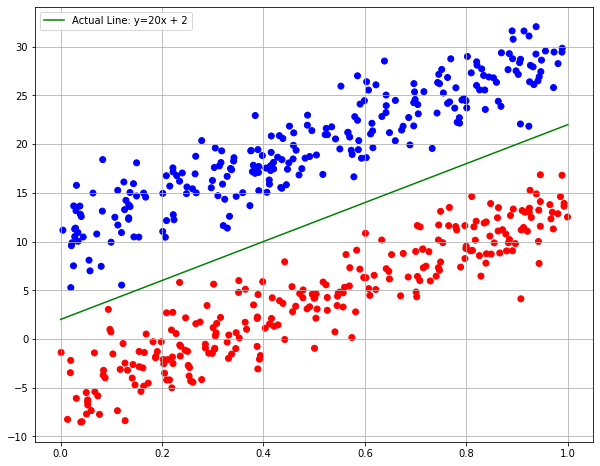

In [192]:
# Show The Predictions
display_random_data(test_data, np.round(model.predict(test_data)))

### Fetching The Model Weights And Calculating The Line

The Code Snippet In The Following Cell Is From This Video: 

[Jeff Heaton - Extracting Keras Weights and Manual Neural Network Calculation (3.5)](https://www.youtube.com/watch?v=7PWgx16kH8s)

It serves no purpose in this workbook, but was critical in my understanding of layers and how weights and biases could be extracted from keras, so I thought i should show it here


In [193]:
# Fetch Model Weights - Code By Jeff Heaton Source: https://www.youtube.com/watch?v=7PWgx16kH8s
# Dump weights
for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} -> L{layerNum+1}N{toNeuronNum} = {wgt2}')


0B -> L1N0: 2.853743076324463
L0N0 -> L1N0 = 15.666455268859863
L0N1 -> L1N0 = -0.8814525604248047


### Calculating The Prediction Line

The single sigmoid layer within this model will describe the following equation:

$
\begin{equation}
{p} = \dfrac{1}{1 + e^{- ((w_0 \times x) + (w_1 \times y) + b_0)}}
\end{equation}
$

$ x $ has a domain of the closed interval $ [0,1] $

The weights can be gathered from the model.

Leaving $ y $ and $ p $ (prediction) unknown.

<br>

The keras model describes its prediction ($ p $) as a float output. The float output has the domain [0,1]. The closer to 0 the prediction, the more confident the model is that the point has class 0. Inversely, the closer the prediction is to 1, the more confident the model is that the point has class 1. 

Therefore, the maximally uncertain output is at exactly 0.5

This is the $ p $ that should be targeted.

By solving the following equation for $ y $ a functional cartesian line can be obtained:

$
\begin{equation}
{0.5} = \dfrac{1}{1 + e^{- ((w_0 \times x) + (w_1 \times y) + b_0)}}
\end{equation}
$

Instead of performing the algebra by hand I used an online algebraic calculator to solve this for y. [Symbol Lab Online Algebraic Calculator](https://www.symbolab.com/solver/step-by-step/solve%20for%20y%2C%200.5%20%3D%20%5Cfrac%7B%5Cleft(1%5Cright)%7D%7B%5Cleft(1%20%2B%20e%5E%7B-%5Cleft(%5Cleft(a%5Ccdot%20x%5Cright)%2B%5Cleft(b%5Ccdot%20y%5Cright)%2Bc%5Cright)%7D%5Cright)%7D%20)

Solving for $ y $ result in this equation:

$
\begin{equation}
{y} =  - \dfrac{w_0 \times x + b_0}{w_1}
\end{equation}
$

This is a graphable equation and will result in the prediction line.

Weight X_1: 15.666455
Weight X_2: -0.88145256
Bias: 2.853743


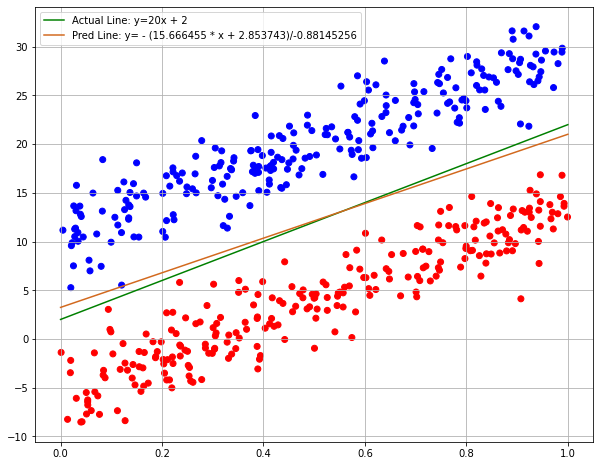

In [194]:
weight_0 = model.get_weights()[0][0][0]
weight_1 = model.get_weights()[0][1][0]
bias = model.get_weights()[1][0]

print('Weight X_1: ' + str(weight_0))
print('Weight X_2: ' + str(weight_1))
print('Bias: ' + str(bias))

# get points for line intercept
# y_at_x_0_prediction = - (((weight_0 * 0) + bias)/weight_1)
# y_at_x_1_prediction = - (((weight_0 * 1) + bias)/weight_1)

display_data_with_pred_line(test_data, np.round(model.predict(test_data)), weight_0, weight_1, bias)

### Heatmaps

The model function maps two variable inputs $ x_1, x_2 $ to a single output $p$:

$ f: x^2 \rightarrow p$

To Visualize the function behavior across the 2d space of the graph defined by $(x_1, x_2)$, a heatmap has been created. This will help to visualize model, and where the model becomes uncertain.

In [0]:
# Heatmap Settings
# granularity larger means more samples
heatmap_granularity = 500

# generate points for testing
hm_x = np.linspace(0, 1, heatmap_granularity)
# go 5 standard deviations out from (y +/- mu) meaning we will cast a net which will only miss on average 1 in 3488556 points
hm_y = np.linspace( (((w*1) + b) + (mu + (sigma * 5))), (b - (mu + (sigma * 5))), heatmap_granularity)

hm_delta_y = abs(hm_y[heatmap_granularity-1]) + abs(hm_y[0]) 

# probably could use numpy here, but my google fu fails me
hm_points = np.empty(((heatmap_granularity * heatmap_granularity), 2))
index = 0;
for y in hm_y:
    for x in hm_x:
        hm_points[index] = (x,y)
        index = index + 1

predictions = model.predict(hm_points)

# Reshape To Image
hm_input = predictions.reshape((heatmap_granularity,heatmap_granularity))

Several Heatmaps Are Available:

1. Matching Colors, but it is hard to decern the point where the model's predictions become uncertain.
2. Mostly Matching Colors, but easier to decern the point of uncertainty.
3. Non Matching Colors, but much easier to see a gradient where the model becomes more uncertain.

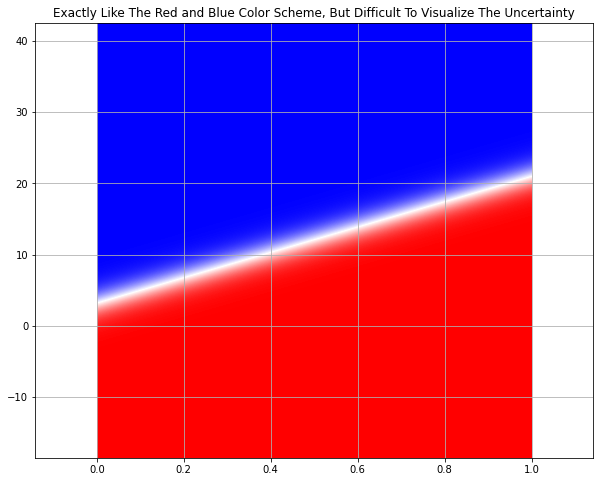

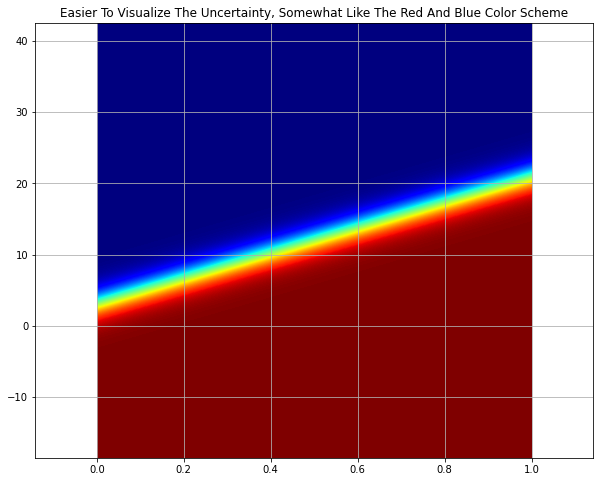

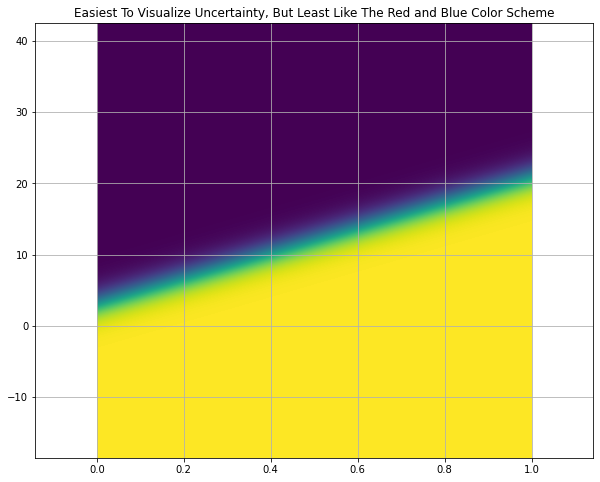

In [196]:
import warnings
warnings.filterwarnings("ignore")
# display_data_with_pred_line(hm_points, np.round(model.predict(hm_points)), weight_0, weight_1, bias)
plt.figure(num=1, figsize=[10,8])
plt.imshow(hm_input, cmap='bwr', interpolation='gaussian', extent=(0, 1, (b - (mu + (sigma * 5))), (((w*1) + b) + (mu + (sigma * 5)))), origin='upper')
plt.axes().set_aspect((1/hm_delta_y), 'datalim')
plt.grid()
plt.title('Exactly Like The Red and Blue Color Scheme, But Difficult To Visualize The Uncertainty')
plt.show()
plt.close()

# Easier To See, but Least Like The Current Color Scheme
plt.figure(num=1, figsize=[10,8])
plt.imshow(hm_input, cmap='jet', interpolation='gaussian', extent=(0, 1, (b - (mu + (sigma * 5))), (((w*1) + b) + (mu + (sigma * 5)))), origin='upper')
plt.axes().set_aspect((1/hm_delta_y), 'datalim')
plt.grid()
plt.title('Easier To Visualize The Uncertainty, Somewhat Like The Red And Blue Color Scheme')
plt.show()
plt.close()

# Easiest To See, but Least Like The Current Color Scheme
plt.figure(num=1, figsize=[10,8])
plt.imshow(hm_input, cmap='viridis', interpolation='gaussian', extent=(0, 1, (b - (mu + (sigma * 5))), (((w*1) + b) + (mu + (sigma * 5)))), origin='upper')
plt.axes().set_aspect((1/hm_delta_y), 'datalim')
plt.grid()
plt.title('Easiest To Visualize Uncertainty, But Least Like The Red and Blue Color Scheme')
plt.show()